In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Baca data dari file Excel
file_path = "C:/Users/reinh/Downloads/Wine Quality Data.xlsx"
wine_data = pd.read_excel(file_path)
print(wine_data)

    Clarity_x1  Aroma_x2  Body_x3  Flavor_x4  Oakiness_x5  Quality_y  Region
0          1.0       3.3      2.8        3.1          4.1        9.8       1
1          1.0       4.4      4.9        3.5          3.9       12.6       1
2          1.0       3.9      5.3        4.8          4.7       11.9       1
3          1.0       3.9      2.6        3.1          3.6       11.1       1
4          1.0       5.6      5.1        5.5          5.1       13.3       1
5          1.0       4.6      4.7        5.0          4.1       12.8       1
6          1.0       4.8      4.8        4.8          3.3       12.8       1
7          1.0       5.3      4.5        4.3          5.2       12.0       1
8          1.0       4.3      4.3        3.9          2.9       13.6       3
9          1.0       4.3      3.9        4.7          3.9       13.9       1
10         1.0       5.1      4.3        4.5          3.6       14.4       3
11         0.5       3.3      5.4        4.3          3.6       12.3       2

In [9]:
print(wine_data.columns)


Index(['Clarity_x1', 'Aroma_x2', 'Body_x3', 'Flavor_x4', 'Oakiness_x5',
       'Quality_y', 'Region'],
      dtype='object')


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Baca data dari file Excel
file_path = "C:/Users/reinh/Downloads/Wine Quality Data.xlsx"
wine_data = pd.read_excel(file_path)

# Pisahkan variabel independen dan dependen
X = wine_data.drop(columns=['Quality_y'])
Y = wine_data['Quality_y']

In [11]:
# Tambahkan kembali kolom 'Region' sebelum membuat dummy variables
X['Region'] = wine_data['Region']

# Buat dummy variables untuk variabel kategori "Region"
X = pd.get_dummies(X, columns=['Region'], drop_first=True)

In [29]:
import pandas as pd
import numpy as np
#Kebutuhan analisis regresi berganda
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# Kebutuhan Uji Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [31]:
# Membuat dummy variables untuk variabel 'Region'
region_dummies = pd.get_dummies(wine_data['Region'], prefix='Reg')

# Menyambungkan dummy variables ke dalam dataframe utama
wine_data = pd.concat([wine_data, region_dummies], axis=1)

# Menghapus kolom 'Region' asli karena sudah tidak diperlukan lagi setelah pembuatan dummy variables
wine_data.drop('Region', axis=1, inplace=True)

print(wine_data.head())  # Menampilkan lima baris pertama dari dataframe yang telah dimodifikasi


   Clarity_x1  Aroma_x2  Body_x3  Flavor_x4  Oakiness_x5  Quality_y  Reg_1  \
0         1.0       3.3      2.8        3.1          4.1        9.8   True   
1         1.0       4.4      4.9        3.5          3.9       12.6   True   
2         1.0       3.9      5.3        4.8          4.7       11.9   True   
3         1.0       3.9      2.6        3.1          3.6       11.1   True   
4         1.0       5.6      5.1        5.5          5.1       13.3   True   

   Reg_2  Reg_3  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  


In [37]:
print(wine_data.dtypes)


Clarity_x1     float64
Aroma_x2       float64
Body_x3        float64
Flavor_x4      float64
Oakiness_x5    float64
Quality_y      float64
Reg_1             bool
Reg_2             bool
Reg_3             bool
dtype: object


In [40]:
# Mengubah tipe data boolean menjadi integer
wine_data['Reg_1'] = wine_data['Reg_1'].astype(int)
wine_data['Reg_2'] = wine_data['Reg_2'].astype(int)
wine_data['Reg_3'] = wine_data['Reg_3'].astype(int)

# Menampilkan kembali tipe data setelah perubahan
print(wine_data.dtypes)


Clarity_x1     float64
Aroma_x2       float64
Body_x3        float64
Flavor_x4      float64
Oakiness_x5    float64
Quality_y      float64
Reg_1            int32
Reg_2            int32
Reg_3            int32
dtype: object


In [42]:
# Menentukan variabel independen (X) dan variabel dependen (Y)
X = wine_data[['Clarity_x1', 'Aroma_x2', 'Body_x3', 'Flavor_x4', 'Oakiness_x5', 'Reg_2', 'Reg_3']]
Y = wine_data['Quality_y']

# Menambahkan konstanta ke variabel independen
X = sm.add_constant(X)

# Membuat model OLS
model = sm.OLS(Y, X)

# Melakukan fitting model ke data
results = model.fit()

# Menampilkan hasil summary dari model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              Quality_y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     22.10
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           3.29e-10
Time:                        05:40:59   Log-Likelihood:                -46.070
No. Observations:                  38   AIC:                             108.1
Df Residuals:                      30   BIC:                             121.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8144      1.969      3.968      

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hitung VIF untuk setiap variabel independen
vif_data = X.assign(const=1)
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)


      Variable         VIF
0        const  175.882605
1   Clarity_x1    1.439151
2     Aroma_x2    3.298392
3      Body_x3    2.149329
4    Flavor_x4    2.693412
5  Oakiness_x5    1.305766
6        Reg_2    1.261194
7        Reg_3    2.550087


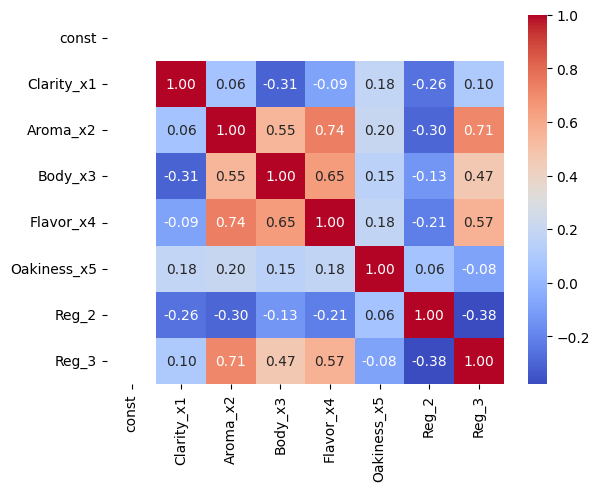

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = X.corr()

# Visualisasi heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
